# Analyzing Star Wars Survey
## Introduction
While waiting for Star Wars: <a href="https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens">The Force Awakens</a> to come out in 2015, the team at <a href="">FiveThirtyEight</a> became interested in answering some questions about Star Wars fans. In particular, they wondered: is “The Empire Strikes Back” truly considered the best episode of the franchise?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which are available on their <a href="https://github.com/fivethirtyeight/data/tree/master/star-wars-survey">GitHub repository</a>.

For this project, we will be cleaning and exploring the data set in Jupyter notebook. We will also answer the following questions:
- Is “The Empire Strikes Back” the best episode of the franchise?
- Are there any differences in rankings and the size of the audience across genders?
- How does an average fan of the Star Wars series look like (in terms of his/her gender, age, education level and household income)? 
   

## Data exploration

In [1]:
import pandas as pd
import numpy as np
from numpy import arange

import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', 40)

star_wars = pd.read_csv("StarWars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

In [3]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The data has several columns, including:

- __RespondentID__ - An anonymized ID for the respondent (person taking the survey)
- __Gender__ - The respondent's gender
- __Age__ - The respondent's age
- __Household Income__ - The respondent's income
- __Education__ - The respondent's education level
- __Location (Census Region)__ - The respondent's location
- __Have you seen any of the 6 films in the Star Wars franchise?__ - Has a Yes or No response
- __Do you consider yourself to be a fan of the Star Wars film franchise?__ - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

## Data cleaning

First, we need to remove the invalid rows. We have to start with __RespondentID__ column that is supposed to be a unique ID for each respondent. If it is blank in some rows, we will remove those rows.

In [4]:
star_wars.RespondentID.isnull().sum()

1

In [5]:
# remove rows with missing unique ID
star_wars = star_wars[star_wars['RespondentID'].notnull()]

Now we will take a look at the next two columns, which are:

- _Have you seen any of the 6 films in the Star Wars franchise?_
- _Do you consider yourself to be a fan of the Star Wars film franchise?_

In [6]:
# see all of the unique values in a column
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [7]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Both columns are currently string types, because the main values they contain are Yes and No. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values True, False, and NaN. 

In [8]:
# perform the conversion to a Boolean
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map({'Yes': True, 'No': False})
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map({'Yes': True, 'No': False})

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, _Which of the following Star Wars films have you seen? Please select all that apply_.

The columns for this question are:

- _Which of the following Star Wars films have you seen? Please select all that apply._ - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- _Unnamed: 4_ - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- _Unnamed: 5_ - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- _Unnamed: 6_ - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
- _Unnamed: 7_ - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- _Unnamed: 8_ - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or did not see the movie. We will assume that they did not see the movie.

We will need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we will need to include the movie title and NaN in the mapping dictionary.

In [9]:
# perform conversion to a Boolean
cols = ['Which of the following Star Wars films have you seen? Please select all that apply.','Unnamed: 4',
        'Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8']
for c in cols:
    star_wars[c] = star_wars[c].apply(lambda l:True if type(l)==str else False)

In [10]:
# check conversion output 
for c in cols:
    print('==============')
    print(star_wars[c].value_counts(dropna=False))

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
False    615
True     571
Name: Unnamed: 4, dtype: int64
False    636
True     550
Name: Unnamed: 5, dtype: int64
True     607
False    579
Name: Unnamed: 6, dtype: int64
True     758
False    428
Name: Unnamed: 7, dtype: int64
True     738
False    448
Name: Unnamed: 8, dtype: int64


In [11]:
# rename column names
new_column_names = {'Which of the following Star Wars films have you seen? Please select all that apply.':'ep_1_seen',
                    'Unnamed: 4':'ep_2_seen',
                    'Unnamed: 5':'ep_3_seen',
                    'Unnamed: 6':'ep_4_seen',
                    'Unnamed: 7':'ep_5_seen',
                    'Unnamed: 8':'ep_6_seen'
                   }
star_wars = star_wars.rename(columns=new_column_names)

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

- _Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film._ - How much the respondent liked Star Wars: Episode I The Phantom Menace
- _Unnamed: 10_ - How much the respondent liked Star Wars: Episode II Attack of the Clones
- _Unnamed: 11_ - How much the respondent liked Star Wars: Episode III Revenge of the Sith
- _Unnamed: 12_ - How much the respondent liked Star Wars: Episode IV A New Hope
- _Unnamed: 13_ - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- _Unnamed: 14_ - How much the respondent liked Star Wars: Episode VI Return of the Jedi



In [12]:
# convert values to numeric type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# rename column names
new_column_names = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
                    'Unnamed: 10':'ranking_2',
                    'Unnamed: 11':'ranking_3',
                    'Unnamed: 12':'ranking_4',
                    'Unnamed: 13':'ranking_5',
                    'Unnamed: 14':'ranking_6'
                   }
star_wars = star_wars.rename(columns=new_column_names)

The data set has also three columns that ask the respondents to indicate if they are fans of the Star Wars franchise and the Star Trek series. Later on we will be able to check if both these famous epic movies share the same target group. The colunns are as follows:

- 'Are you familiar with the Expanded Universe?',
- 'Do you consider yourself to be a fan of the Expanded Universe?æ',
- 'Do you consider yourself to be a fan of the Star Trek franchise?'

In [13]:
# define a function to convert values to a Boolean
def covert_values(row):
    cols = star_wars.iloc[:,30:33].columns
    for c in cols:
        value = row[c]
        if(value=='No'):
            row[c] = False
        elif(value=='Yes'):
            row[c] = True
    return row

star_wars.iloc[:,30:33] = star_wars.iloc[:,30:33].apply(covert_values,axis=1)

# rename column names
new_column_names = {'Are you familiar with the Expanded Universe?':'is_familiar_with_star_wars',
       'Do you consider yourself to be a fan of the Expanded Universe?æ':'is_star_wars_fan',
       'Do you consider yourself to be a fan of the Star Trek franchise?':'is_star_trek_fan'
                   }
star_wars = star_wars.rename(columns=new_column_names)

If we look carefully at the values in the column *is_star_wars_fan*, we can see that some of its missing values can be imputed with the values from the *is_familiar_with_star_wars* column. In particular, if a respondent is not familiar with the Star Wars movies, we can assume that he or she can not be a fan of the series either. Therefore, we will replace missing values in the column *is_star_wars_fan* with *False* if there is *False* in the *is_familiar_with_star_wars* column. 

In [14]:
star_wars.iloc[:,30:32].head(10)

,is_familiar_with_star_wars,is_star_wars_fan
1,True,False
2,NaN,NaN
3,False,NaN
4,False,NaN
5,True,False
6,True,False
7,True,False
8,False,NaN
9,False,NaN
10,False,NaN


In [15]:
print('number of NaN values before imputation: ')
print(star_wars['is_star_wars_fan'].isnull().sum())

# impute missing values
is_familiar_mask = star_wars['is_familiar_with_star_wars'] == False
star_wars['is_star_wars_fan'] = star_wars['is_star_wars_fan'].mask(is_familiar_mask,False)
print('number of NaN values after imputation: ')
print(star_wars['is_star_wars_fan'].isnull().sum())

number of NaN values before imputation: 
973
number of NaN values after imputation: 
358


As we can see, due to the imputation the number of missing values in *is_star_wars_fan* has decreased almost by 2/3.

And to finalize our data cleaning we have to check the last 4 columns:
- _Gender_ - Gender of a respondent
- _Age_ - Age of a respondent
- _Household Income_ - Household income of a respondent
- _Education_ - Education level of a respondent

Those data will help us define the portrait of an average Star Wars fan.

In [16]:
# explore data in the column 'Gender'
star_wars.iloc[:,33].value_counts(dropna=False)

Female    549
Male      497
NaN       140
Name: Gender, dtype: int64

In [17]:
# explore data in the column 'Age'
star_wars.iloc[:,34].value_counts(dropna=False)

45-60    291
> 60     269
30-44    268
18-29    218
NaN      140
Name: Age, dtype: int64

In [18]:
# explore some values in the column 'Age'
star_wars.iloc[:,34] = star_wars.iloc[:,34].apply(lambda l:'>60' if l=='> 60' else l)
star_wars.iloc[:,34].value_counts(dropna=False)

45-60    291
>60      269
30-44    268
18-29    218
NaN      140
Name: Age, dtype: int64

In [19]:
# explore data in the column 'Household Income'
star_wars.iloc[:,35].value_counts(dropna=False)

NaN                    328
$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: Household Income, dtype: int64

In [20]:
# reformat string values in the column 'Household Income'
star_wars['Household Income'] = np.where(pd.isnull(star_wars['Household Income']),star_wars['Household Income'],
         star_wars['Household Income'].astype(str).str.replace(' ','').str.strip())

star_wars['Household Income'] = star_wars['Household Income'].apply(lambda l:'<$24,999'if l=='$0-$24,999' else l)

star_wars['Household Income'].value_counts()

$50,000-$99,999      298
$25,000-$49,999      186
$100,000-$149,999    141
<$24,999             138
$150,000+             95
Name: Household Income, dtype: int64

In [21]:
star_wars['Education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

## Data analysis
### Rankings and views

Text(0.5,1,'Star Wars Episodes: ranking')

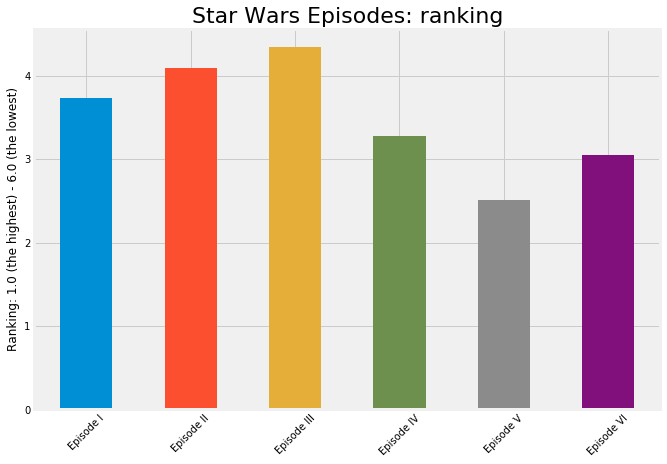

In [22]:
#build a graph to visualize episodes' rankings
%matplotlib inline      
star_wars.iloc[:,9:15].mean().plot.bar(figsize=(10,7))
plt.xticks(np.arange(0,6),['Episode I','Episode II','Episode III','Episode IV','Episode V','Episode VI'],rotation=45)
plt.ylabel("Ranking: 1.0 (the highest) - 6.0 (the lowest)")
plt.title("Star Wars Episodes: ranking",fontsize=22)

As can be seen from the graph, __Star Wars: Episode V The Empire Strikes Back__ appears to be ranked the highest. Interestingly, __the first three episodes are__ on average __ranked lower__ than the episodes VI, V and VI. Although the former were filmed much earlier and have less sophisticated visual effects, the American audience finds them more enjoyable. 

Let's figure out how many people have seen each movie. To achieve that, we will take the sum of the correspondings columns.

Text(0.5,1,'Star Wars Episodes: the most watched')

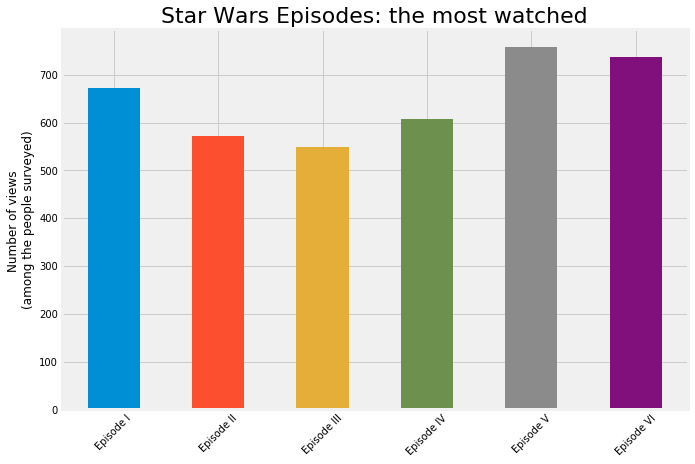

In [23]:
#build a graph to visualize episodes' rankings
star_wars.iloc[:,3:9].sum().plot.bar(figsize=(10,7))
plt.xticks(np.arange(0,6),['Episode I','Episode II','Episode III','Episode IV','Episode V','Episode VI'],rotation=45)
plt.ylabel("Number of views \n(among the people surveyed)")
plt.title("Star Wars Episodes: the most watched",fontsize=22)

The graph above indicates the __same tendency: the numbers are distributed according to the rankings of the episodes. Obviously, the correlation of ranking and the number of views is strong. Episode V The Empire Strikes Back is leading__ here againg, whereas __the episodes II and III are the least watched__. 

Therefore, we can conclude that __Episode V "The Empire Strikes Back" is the most watched and ranked movie of the franchise__ in the USA.

### Rankings and views by gender

We know which movies the survey population as a whole has ranked the highest. Now we will examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

- _Do you consider yourself to be a fan of the Star Wars film franchise?_ - True or False
- _Do you consider yourself to be a fan of the Star Trek franchise?_ - Yes or No
- _Gender_ - Male or Female

In [24]:
# split a dataframe into two gender groups
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

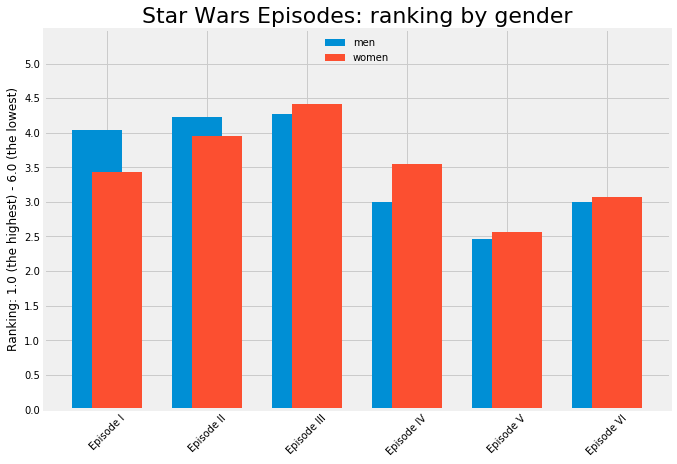

In [25]:
# draw a graph displaying rankings distribution by gender
fig,ax = plt.subplots(figsize=(10,7))
plt1 = ax.bar(arange(6)+1,males.iloc[:,9:15].mean(),0.5)
ax.set_xticks(arange(6)+1.1)
ax.set_yticks(arange(0,5.5,step=0.5))
ax.set_xticklabels(['Episode I','Episode II','Episode III','Episode IV','Episode V','Episode VI'],rotation=45)
plt.ylim(0,5.5)

plt2 = ax.bar(arange(6)+1.2,females.iloc[:,9:15].mean(),0.5)

ax.legend(handles=[plt1,plt2],labels=['men','women'],loc='upper center',frameon=False)
plt.ylabel("Ranking: 1.0 (the highest) - 6.0 (the lowest)")
plt.title("Star Wars Episodes: ranking by gender",fontsize=22)

plt.show()

The graph shows that there is __a slight difference in the rankings of the episodes__ compared by gender. Overall, women tend to rank the Star Wars film series a bit higher. Nevertheless, the overall tendency to prefer the last three episodes over the first ones remains valid for both genders.

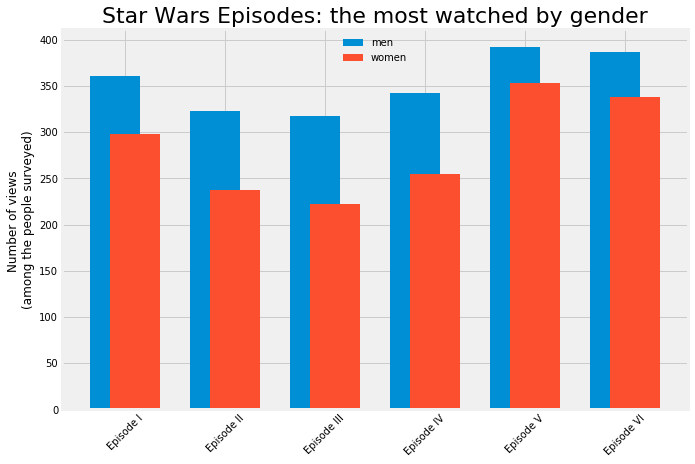

In [26]:
# draw a graph displaying the number of views by gender
fig,ax = plt.subplots(figsize=(10,7))
plt1 = ax.bar(arange(6)+1,males.iloc[:,3:9].sum(),0.5)
ax.set_xticks(arange(6)+1.1)
ax.set_xticklabels(['Episode I','Episode II','Episode III','Episode IV','Episode V','Episode VI'],rotation=45)

plt2 = ax.bar(arange(6)+1.2,females.iloc[:,3:9].sum(),0.5)

ax.legend(handles=[plt1,plt2],labels=['men','women'],loc='upper center',frameon=False)
plt.ylabel("Number of views \n(among the people surveyed)")
plt.title("Star Wars Episodes: the most watched by gender",fontsize=22)

plt.show()

As we can see from the graph, __the Star Wars series are undoubtedly less popular among women__. Nonetheless, __both men and women have the same preferences__ when it comes to wathing a certain episode.

### The portrait of an average Star Wars fan
Let's find out how an average Star Wars fan looks like. To solve this task, we have to answer the following questions:
- Who is this person by gender?
- What is his/her age?
- What kind of education has he/she acquired?
- What is his/her household income?
- Are the Star Wars fans also fond of the Star Trek series?

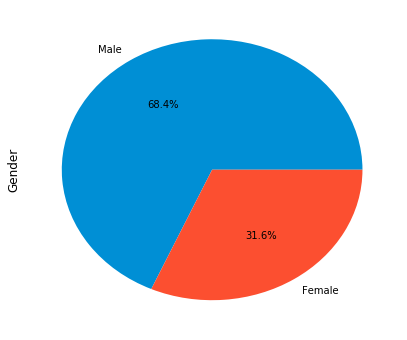

In [27]:
# select data related to the Star War fans only
fans = star_wars[star_wars['is_star_wars_fan']==True]

# build a graph displaying gender composition of the Star Wars fans community
fans['Gender'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

The graph above indicates that __the core audience of the Star Wars franchise are men__. They account for 68% of all the fans surveyed. 

Text(0.5,1,'Age variability the Star Wars fans \nby age')

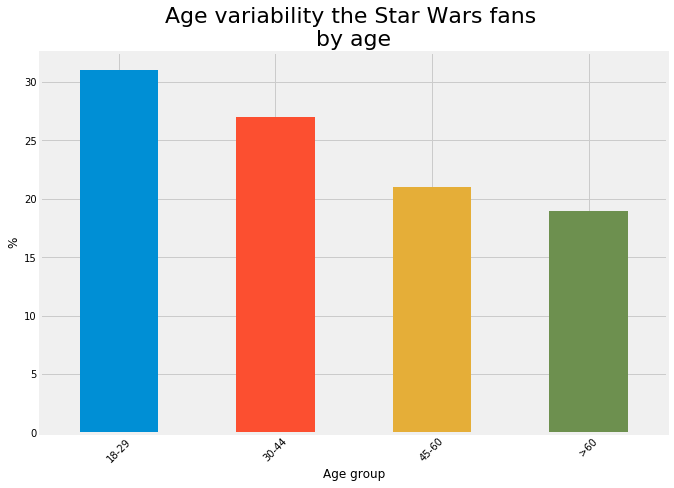

In [28]:
# build a graph displaying age composition of the Star Wars fans
fans['Age'].value_counts().plot.bar(figsize=(10,7))
plt.xticks(rotation=45)
plt.xlabel("Age group")
plt.ylabel("%")
plt.title("Age variability the Star Wars fans \nby age",fontsize=22)

The graph shows that __the largest fraction of the Star Wars fans is made up by 18-29 year-olds__. Interestingly, that __just over 40% of all the fans are 45+ years old__. Moreover, the difference in terms of size between the youngest and the oldest fractions is only 12%. We can suggest that such a high popularity of the series among various age groups can be explained by the following fact: the episodes IV-VI were filmed in the 1980s, whereas the episodes I-III were filmed in the late 2000s and early 2010s. Therefore, we can assume that the long presence of the franchise on the film market can partly explain __guite an extensive age variability__ among its fans.

Text(0.5,1,'Education level: fans')

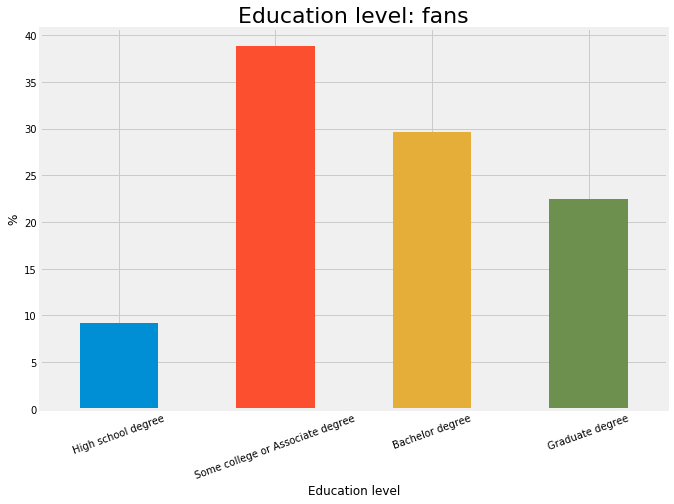

In [29]:
# build a graph displaying distribution of education levels among the Star Wars fans
(fans['Education'].value_counts(normalize=True)*100).iloc[[3,0,1,2]].plot.bar(figsize=(10,7))
plt.xticks(rotation=20)
plt.xlabel("Education level")
plt.ylabel("%")
plt.title("Education level: fans",fontsize=22)

Text(0.5,1,'Education level: all respondents')

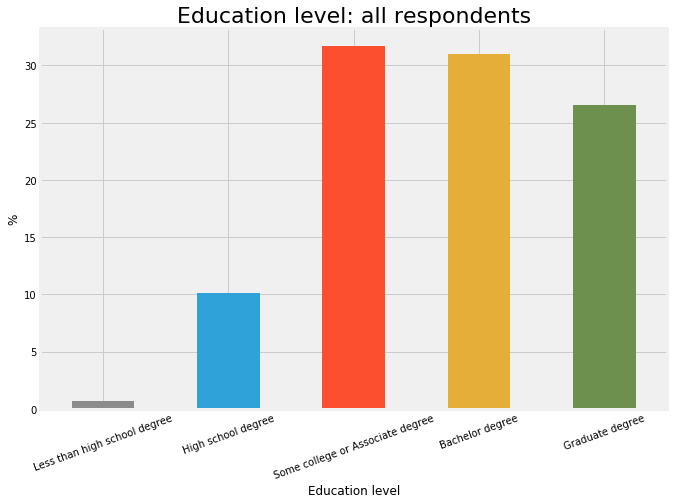

In [30]:
# build a graph displaying distribution of education levels among all the respondents
(star_wars['Education'].value_counts(normalize=True)*100).iloc[[4,3,0,1,2]].plot.bar(figsize=(10,7),
                                        color=['#8b8b8b','#30a2da', '#fc4f30', '#e5ae38', '#6d904f'])
plt.xticks(rotation=20)
plt.xlabel("Education level")
plt.ylabel("%")
plt.title("Education level: all respondents",fontsize=22)

According to the graphs above, we can state that __the difference between the Star Wars fans and the rest of the respondents in terms of their education level is insignificant__.   

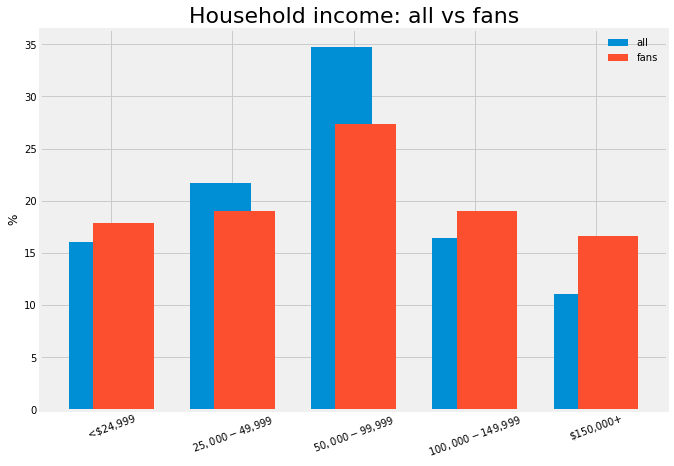

In [31]:
# draw a graph displaying distribution of household income
fig,ax = plt.subplots(figsize=(10,7))
plt1 = ax.bar(arange(5)+1,(star_wars['Household Income'].value_counts(normalize=True)*100).iloc[[3,1,0,2,4]].values,0.5)
ax.set_xticks(arange(5)+1.1)
ax.set_xticklabels(star_wars['Household Income'].value_counts().iloc[[3,1,0,2,4]].index,rotation=20)

plt2 = ax.bar(arange(5)+1.2,(fans['Household Income'].value_counts(normalize=True)*100).iloc[[3,1,0,2,4]].values,0.5)

ax.legend(handles=[plt1,plt2],labels=['all','fans'],loc='upper right',frameon=False)
plt.ylabel("%")
plt.title("Household income: all vs fans",fontsize=22)

plt.show()

The graph indicates that __most of the respondents as well as the Star Wars fans have a household income in the range of $ 50,000 - 99,999__. However, there are slightly more people with a higher income among the fans of the franchise.

In [32]:
# check correlation 
star_wars.loc[:,['is_star_trek_fan','is_star_wars_fan']].astype(float).corr()

,is_star_trek_fan,is_star_wars_fan
is_star_trek_fan,1.000000,0.166617
is_star_wars_fan,0.166617,1.000000


As we see, the correlation of *is_star_trek_fan* and *is_star_wars_fan* columns is weak. Therefore, we can suggest that __the Star Wars fans do not necessarily share the same passion about the Star Trek series__ and vice versa. 

## Conclusions

In this project, we have cleaned and explored the data set based on the survey of the Star Wars fans. We have also answered the following questions:
- Is “The Empire Strikes Back” the best episode of the franchise?
- Are there any differences in rankings and the size of the audience across genders?
- How does an average fan of the Star Wars series look like (in terms of his/her gender, age, education level and household income)?

__NB! This project is carried out according to the <a href='https://www.dataquest.io'>dataquest</a> instructions.__ 